# Fully-Connected Networks

This notebook considers experiments equivalent to Fig. $2$, $3$, $4$, $5$ for fully-connected networks. All parameters are left unchanged apart from the parameters `batch_size` and `kernel_size`. The fully-connected behaviour is simply enforced by setting `kernel_size = 1` with the effect of flattening the original images and reducing the spatial extent to $n=1$.

For the experiments of Fig. $3$, $4$, $5$, the number of realizations is reduced to `num_realizations = 200`. This has the effect of making the curves slightly more noisy, but it is already enough to gain insights.

## Moments of Vanilla Nets

The results here are equivalent to Fig. $2$ with the only difference that $\log \mu_2(\mathrm{d}\mathbf{x}^l)$ diffuses faster. 

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this experiment ran in the cloud, but it is left here to show the function call
run_experiment(architecture='vanilla', total_depth=200, kernel_size=1, num_channels=128, 
               dataset='cifar10', # boundary conditions are not relevant for fully-connected networks
               batch_size=1024, num_realizations=10000, name_experiment='vanilla_histo_FC', 
               num_computations=4, # only compute 4 moments, at depth 50, 100, 150, 200
               compute_reff_signal=False, compute_reff_noise=False, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='vanilla_histo', name_experiment='vanilla_histo_fc')

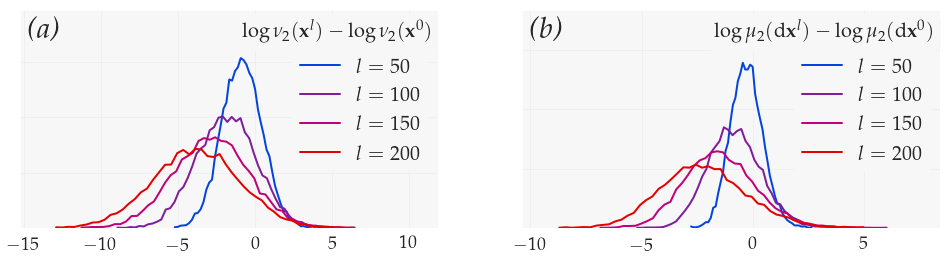

In [1]:
from manage_experiments import load_experiment
from plots import plot_vanilla_histo
%matplotlib inline

moments = load_experiment('vanilla_histo_fc')
plot_vanilla_histo(moments, use_tex=True, name_fig=None)

## Evolution of Vanilla Nets

The evolution of fully-connected vanilla nets is equivalent to the evolution of Fig. $3$ with the convergence to $\delta \chi^l \to 1$ and the convergence to the pathology of one-dimensional signal: $r_\text{eff}(\mathbf{x}^l) \to 1$. 

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this experiment ran in the cloud, but it is left here to show the function call
run_experiment(architecture='vanilla', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=64, num_realizations=200, name_experiment='vanilla_fc', 
               compute_reff_signal=True, compute_reff_noise=False, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='vanilla', name_experiment='vanilla_fc')

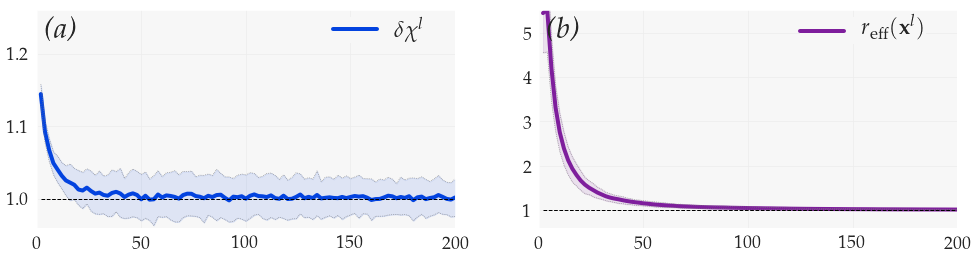

In [2]:
from manage_experiments import load_experiment
from plots import plot_vanilla
%matplotlib inline

moments_vanilla = load_experiment('vanilla_fc')
plot_vanilla(moments_vanilla, use_tex=True, name_fig=None)

## Evolution of Batch-Normalized Feedforward Nets

*As in Fig. $4$, fully-connected batch-normalized feedforward nets are subject to the pathology of exploding sensitivity. However, there is an earlier saturation of the pathologies in the signal, with relatively large $r_\text{eff}(\mathbf{x}^l)$ and low $\mu_4(\mathbf{z}^l)$.* 

The reason is that rare events cannot be arbitrarily rare for a distribution comprised of a finite number of point masses, $\frac{1}{M} \sum^M_{i=1} \delta_{p_i}$. Indeed it is shown in the paper that the kurtosis of $M$ point masses is roughly bounded by $M$. For convolutional networks, $M$ is larger than the batch size since the data distribution depends on the input $\mathbf{x}$ and the spatial position $\alpha$

Smaller batch size leads to larger $\delta^{}_\phi \chi^l$ and smaller $\delta^{}_\text{BN} \chi^l$. Interestingly, this also leads to the noise geting ill-conditioned with lower $r_\text{eff}(\mathrm{d}\mathbf{x}^l)$.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# these experiments ran in the cloud, but they are left here to show the function calls
run_experiment(architecture='bn_ff', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=64, num_realizations=200, name_experiment='bn_ff_fc_64', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

run_experiment(architecture='bn_ff', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=128, num_realizations=200, name_experiment='bn_ff_fc_128', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

run_experiment(architecture='bn_ff', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=256, num_realizations=200, name_experiment='bn_ff_fc_256', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

run_experiment(architecture='bn_ff', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=512, num_realizations=200, name_experiment='bn_ff_fc_512', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='bn_ff', name_experiment='bn_ff_fc_64')
prune_experiment(type_plot='bn_ff', name_experiment='bn_ff_fc_128')
prune_experiment(type_plot='bn_ff', name_experiment='bn_ff_fc_256')
prune_experiment(type_plot='bn_ff', name_experiment='bn_ff_fc_512')

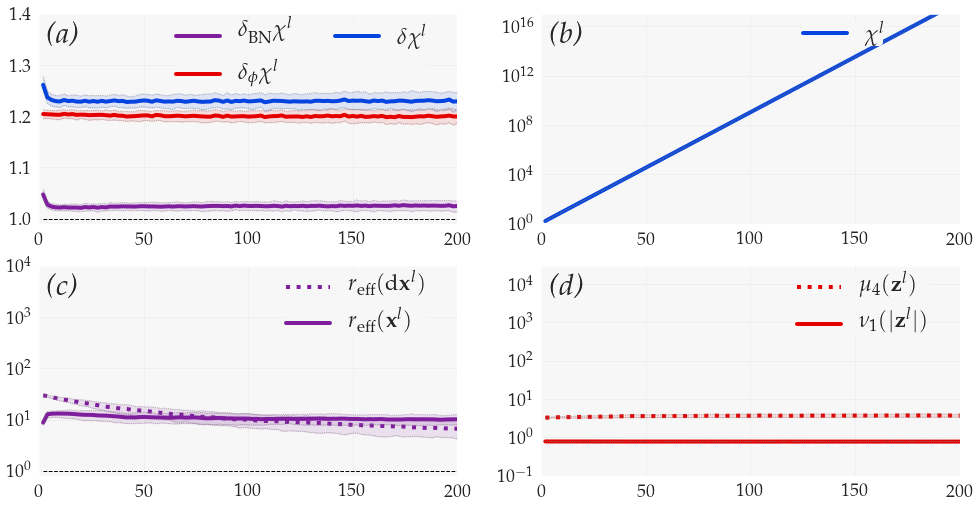

In [3]:
from manage_experiments import load_experiment
from plots import plot_bn_ff
%matplotlib inline

moments_bn_ff = load_experiment('bn_ff_fc_64')
plot_bn_ff(moments_bn_ff, use_tex=True, name_fig=None)

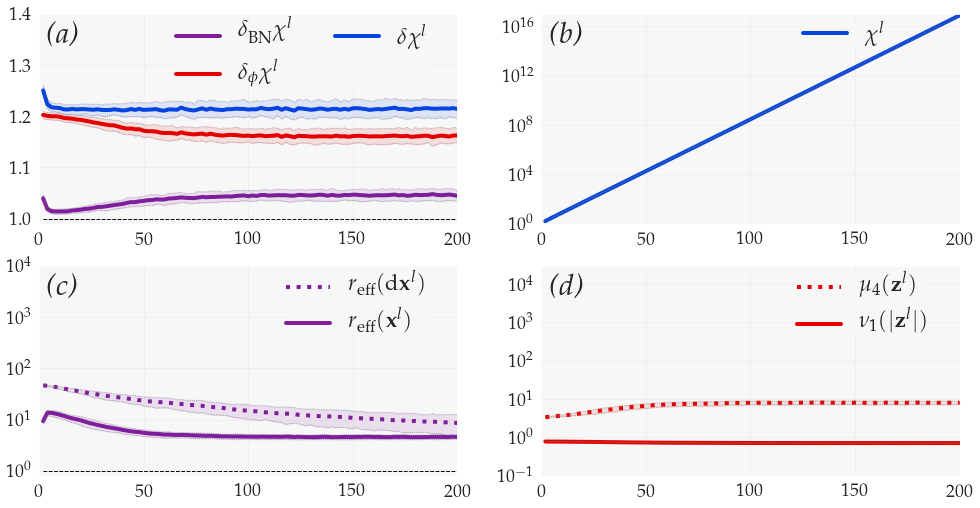

In [4]:
from manage_experiments import load_experiment
from plots import plot_bn_ff
%matplotlib inline

moments_bn_ff = load_experiment('bn_ff_fc_128')
plot_bn_ff(moments_bn_ff, use_tex=True, name_fig=None)

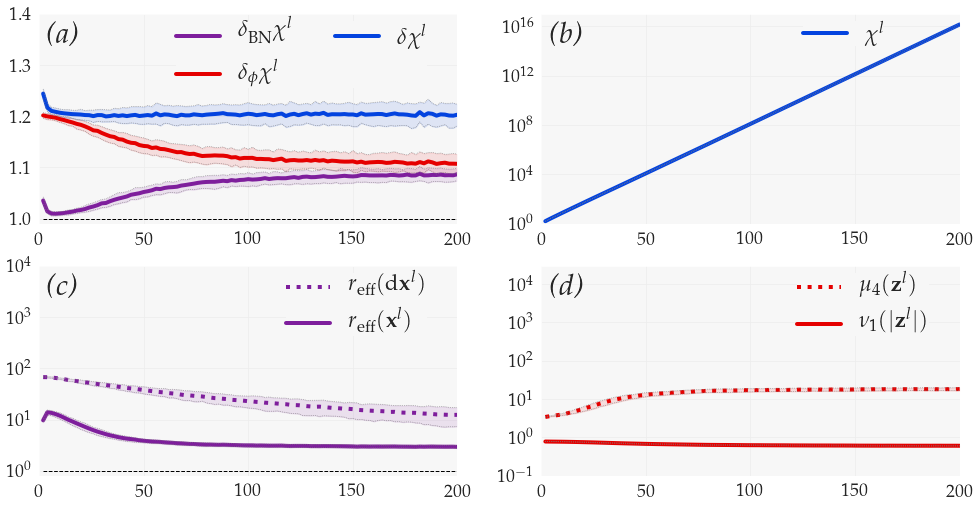

In [5]:
from manage_experiments import load_experiment
from plots import plot_bn_ff
%matplotlib inline

moments_bn_ff = load_experiment('bn_ff_fc_256')
plot_bn_ff(moments_bn_ff, use_tex=True, name_fig=None)

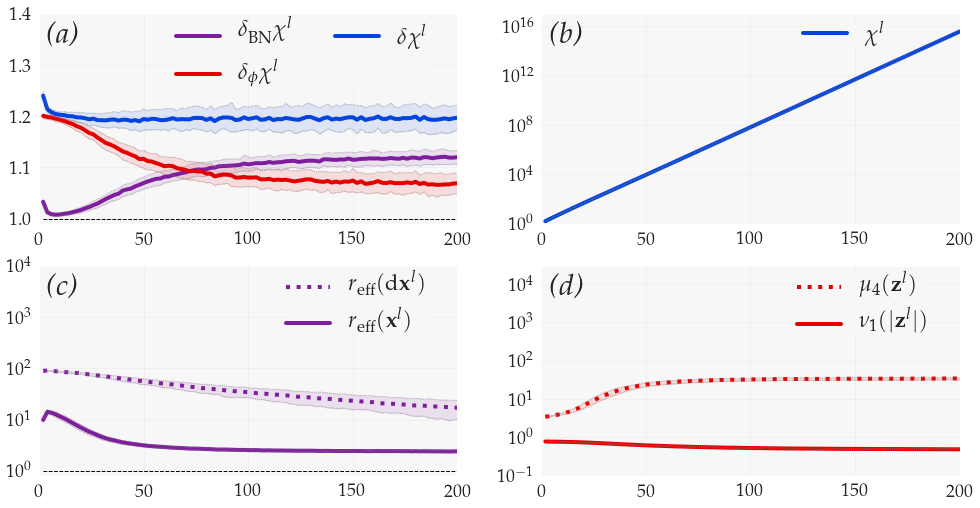

In [6]:
from manage_experiments import load_experiment
from plots import plot_bn_ff
%matplotlib inline

moments_bn_ff = load_experiment('bn_ff_fc_512')
plot_bn_ff(moments_bn_ff, use_tex=True, name_fig=None)

## Evolution of Batch-Normalized Resnets

*The evolution of batch-normalized resnets is the slowed down version of the evolution of batch-normalized feedforward nets*, with perfect power-law fit of $\chi^l$ and the subplots (a), (c), (d) very similar to the subplots (a), (c), (d) for batch-normalized feedforward nets.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this experiment ran in the cloud, but it is left here to show the function call
run_experiment(architecture='bn_res', total_depth=500, kernel_size=1, num_channels=512, 
               dataset='cifar10', res_depth=2,  # boundary conditions are not relevant for fully-connected networks
               batch_size=64, num_realizations=200, name_experiment='bn_res_fc', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='bn_res', name_experiment='bn_res_fc')

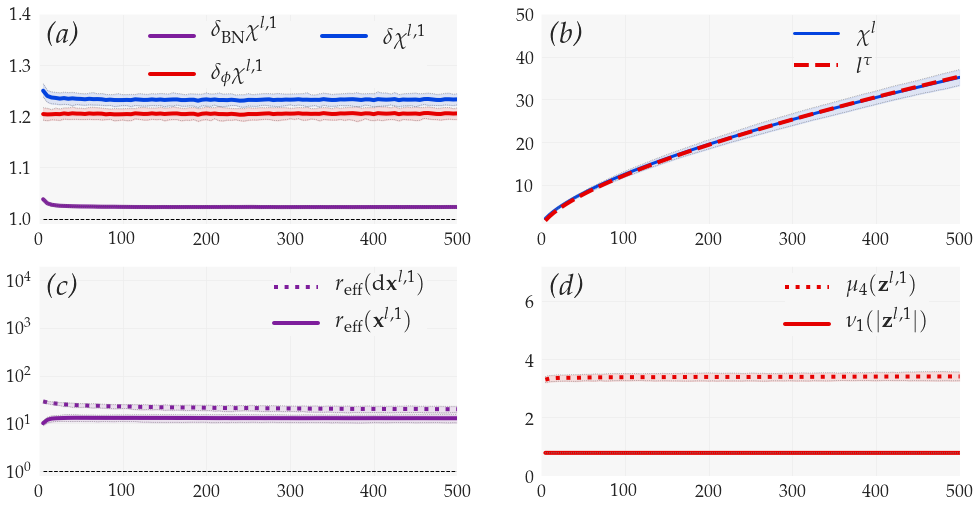

In [7]:
from manage_experiments import load_experiment
from plots import plot_bn_res
%matplotlib inline

moments_bn_res = load_experiment('bn_res_fc')
plot_bn_res(moments_bn_res, use_tex=True , name_fig=None)